<h1 style="text-align:center;">  <strong> <i> Predicción y clasificación de celulares móviles con Machine Learning </i> </strong>  </h1>

# Acerca del Dataset

## Contexto
Bob ha iniciado su propia compañía de teléfonos móviles.
Quiere competir fuertemente contra grandes empresas como Apple y Samsung.

Sin embargo, no sabe cómo estimar el precio de los móviles que su compañía fabrica.
En este mercado competitivo de teléfonos móviles no se pueden simplemente asumir las cosas.
Para resolver este problema, Bob recopila datos de ventas de teléfonos móviles de varias compañías.

Bob quiere encontrar alguna relación entre las características de un teléfono móvil
(por ejemplo: RAM, memoria interna, etc.) y su precio de venta.
Pero él no es tan bueno en Machine Learning, así que necesita tu ayuda para resolver este problema.

En este problema no tienes que predecir el precio exacto,
sino un **rango de precios** que indique qué tan alto es el precio.

# 1- Leer y analizar dataset

In [21]:
import pandas as pd

In [22]:
# leer dataset de entrenamiento
URL = "./dataset/mobile_prices/train.csv"
df = pd.read_csv(URL)

## 1.1- Estructura del dataframe

In [23]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [25]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [30]:
# correlacion de las columnas
corr = df.corr()["price_range"].sort_values(ascending=False)

corr

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [39]:
# Verificar desbalanceo del target
print(df['price_range'].value_counts())
print(df['price_range'].value_counts(normalize=True))

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64
price_range
1    0.25
2    0.25
3    0.25
0    0.25
Name: proportion, dtype: float64


## 1.2- Representación gráfica de los datos

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\Marco\AppData\Local\Temp\ipykernel_29484\1200066497.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette="coolwarm")


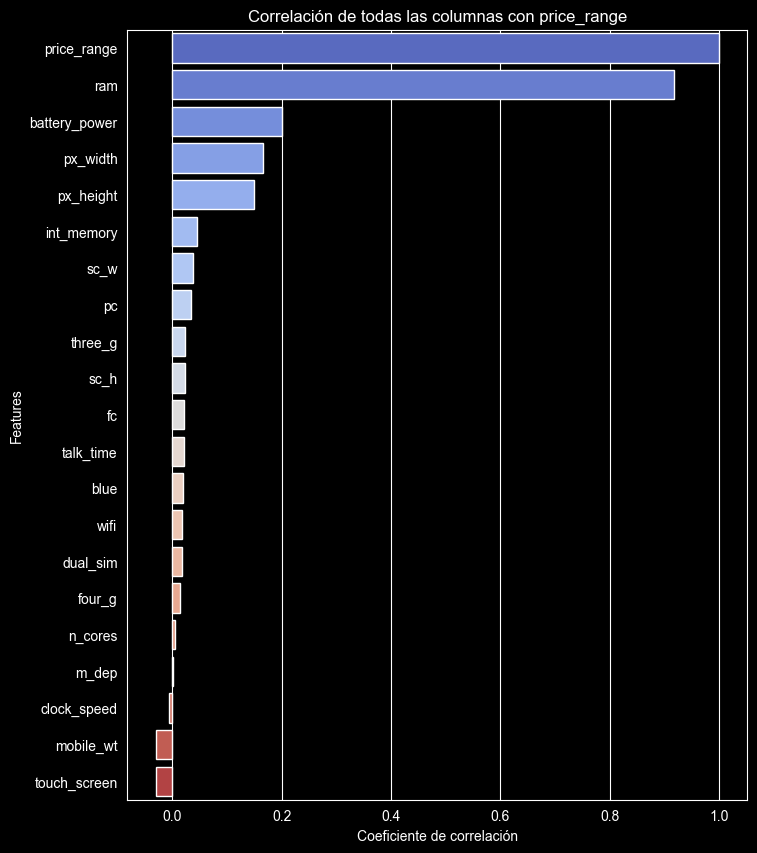

In [28]:
corr_target = df.corr()["price_range"].sort_values(ascending=False)

plt.figure(figsize=(8, 10))
sns.barplot(x=corr_target.values, y=corr_target.index, palette="coolwarm")
plt.title("Correlación de todas las columnas con price_range")
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Features")
plt.show()

# 2- Construccion del modelo de clasificacion (RandomForest)

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## 2.1- Auxiliares

In [32]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [33]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

## 2.2- Dividir conjunto de datos

In [36]:
train_set, val_set, test_set = train_val_test_split(df, rstate=42, shuffle=True, stratify="price_range")

In [37]:
X_train, y_train = remove_labels(train_set, 'price_range')
X_val, y_val = remove_labels(val_set, 'price_range')
X_test, y_test = remove_labels(test_set, 'price_range')

In [38]:
print("Longitud del conjunto de entrenamiento: ",len(X_train))
print("Longitud del conjunto de validacion: ", len(X_val))
print("Longitud del conjunto de pruebas: ", len(X_test))

Longitud del conjunto de entrenamiento:  1200
Longitud del conjunto de validacion:  400
Longitud del conjunto de pruebas:  400


## 2.3- Construccion y entrenamiento del modelo de clasificacion

In [55]:
# buscar mejores hiperparametros para el modelo
clf_rnd = RandomForestClassifier(random_state=42, n_jobs=-1)

# Definir el grid de hiperparámetros
param_grid = {
    "n_estimators": [200, 300, 400],
    "max_depth": [15, 20, 25],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [2, 5, 7],
    "max_features": ["sqrt", "log2"]
}

grid_search = GridSearchCV(
    estimator=clf_rnd,
    param_grid=param_grid,
    cv=5,                   # validación cruzada en 5 folds
    scoring="f1_macro",     # optimizar F1 macro
    n_jobs=-1,              # usar todos los núcleos
    verbose=2
)

grid_search.fit(X_train, y_train)

# Resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

print("\nMejor F1 macro en validación cruzada:")
print(grid_search.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Mejores hiperparámetros encontrados:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

Mejor F1 macro en validación cruzada:
0.847267691392919


In [57]:
# modelo con los hiperparametros mas optimos encontrados por GridSearchCV
clf_rnd = RandomForestClassifier(
    n_estimators=300,        # más árboles para mayor estabilidad
    max_depth=20,          # que cada árbol crezca hasta que no haya más splits útiles
    min_samples_split=5,     # mínimo de muestras para dividir un nodo
    min_samples_leaf=2,      # mínimo de muestras en una hoja
    max_features="sqrt",
    random_state=42,
    n_jobs=-1                # usa todos los núcleos disponibles
)

In [58]:
clf_rnd.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",20
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [59]:
y_val_pred = clf_rnd.predict(X_val)

In [63]:
print("Reporte de clasificación (Validación):")
print(classification_report(y_val, y_val_pred))

print("Matriz de confusión (Validación):")
print(confusion_matrix(y_val, y_val_pred))

Reporte de clasificación (Validación):
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       100
           1       0.83      0.85      0.84       100
           2       0.84      0.81      0.82       100
           3       0.91      0.93      0.92       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

Matriz de confusión (Validación):
[[93  7  0  0]
 [ 6 85  9  0]
 [ 0 10 81  9]
 [ 0  0  7 93]]


## 2.4- Representación gráfica de las métricas del modelo (evaluación)

In [44]:
import numpy as np

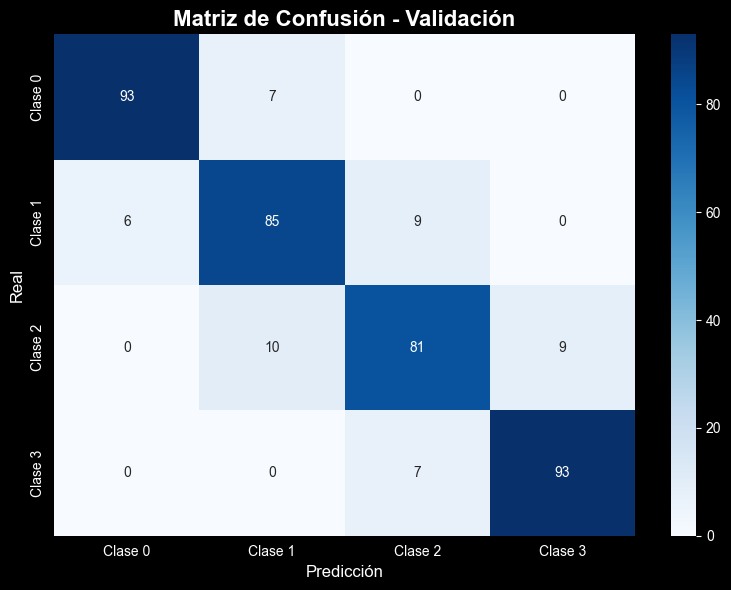

In [61]:
# metricas
cm = np.array([[93, 7, 0, 0],
               [6, 85, 9, 0],
               [0, 10, 81, 9],
               [0, 0, 7, 93]])

# etiquetas
labels = ["Clase 0", "Clase 1", "Clase 2", "Clase 3"]

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)

plt.title("Matriz de Confusión - Validación", fontsize=16, weight="bold")
plt.xlabel("Predicción", fontsize=12)
plt.ylabel("Real", fontsize=12)
plt.tight_layout()

plt.show()

C:\Users\Marco\AppData\Local\Temp\ipykernel_29484\3793633082.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importances, palette="viridis")


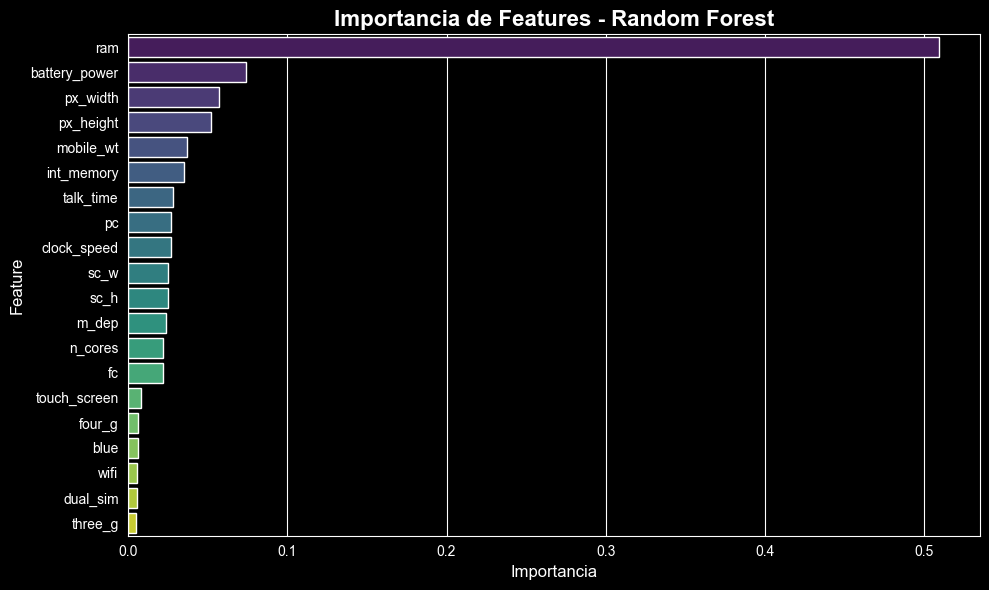

In [62]:
importances = clf_rnd.feature_importances_

# crear DataFrame
feat_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Visualizar
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importances, palette="viridis")

plt.title("Importancia de Features - Random Forest", fontsize=16, weight="bold")
plt.xlabel("Importancia", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

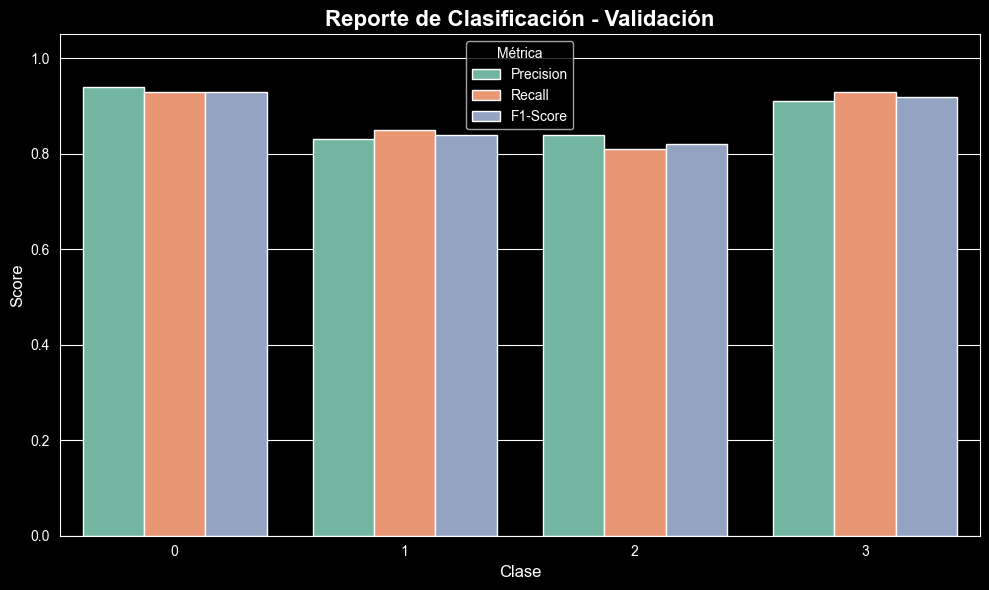

In [64]:
report_data = {
    "Clase": ["0", "1", "2", "3"],
    "Precision": [0.94, 0.83, 0.84, 0.91],
    "Recall":    [0.93, 0.85, 0.81, 0.93],
    "F1-Score":  [0.93, 0.84, 0.82, 0.92],
    "Support":   [100, 100, 100, 100]
}

df_report = pd.DataFrame(report_data)

df_melted = df_report.melt(id_vars="Clase", value_vars=["Precision", "Recall", "F1-Score"],
                           var_name="Métrica", value_name="Valor")

plt.figure(figsize=(10,6))
sns.barplot(x="Clase", y="Valor", hue="Métrica", data=df_melted, palette="Set2")

plt.title("Reporte de Clasificación - Validación", fontsize=16, weight="bold")
plt.ylim(0,1.05)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Clase", fontsize=12)
plt.legend(title="Métrica")
plt.tight_layout()

plt.show()

# 3- Predicción de nuevas entradas

## 3.1- leer dataset de pruebas (solo para predicción)

In [74]:
# leer dataset de pruebas
URL = "./dataset/mobile_prices/test.csv"
df_pruebas = pd.read_csv(URL)

pruebas_set = df_pruebas.sample(8)

In [75]:
X_new = pruebas_set.drop(columns=["id"])

In [76]:
y_pruebas_pred = clf_rnd.predict(X_new)

In [78]:
resultados = pd.DataFrame({
    "id": pruebas_set["id"],
    "price_range_pred": y_pruebas_pred
})

resultados.head()

,id,price_range_pred
105,106,2
550,551,3
456,457,2
998,999,2
489,490,1


## 3.2- Simular entradas (para evaluar)

In [79]:
nuevas_entradas = [
    {
        "battery_power": 1800, "blue": 1, "clock_speed": 2.0, "dual_sim": 1,
        "fc": 8, "four_g": 1, "int_memory": 32, "m_dep": 0.5, "mobile_wt": 140,
        "n_cores": 4, "pc": 13, "px_height": 900, "px_width": 1200, "ram": 2500,
        "sc_h": 15, "sc_w": 7, "talk_time": 12, "three_g": 1, "touch_screen": 1,
        "wifi": 1, "price_range": 2
    },
    {
        "battery_power": 1500, "blue": 0, "clock_speed": 1.8, "dual_sim": 1,
        "fc": 5, "four_g": 0, "int_memory": 16, "m_dep": 0.3, "mobile_wt": 160,
        "n_cores": 2, "pc": 8, "px_height": 600, "px_width": 1000, "ram": 1200,
        "sc_h": 12, "sc_w": 6, "talk_time": 10, "three_g": 1, "touch_screen": 0,
        "wifi": 0, "price_range": 1
    },
    {
        "battery_power": 2000, "blue": 1, "clock_speed": 2.2, "dual_sim": 0,
        "fc": 12, "four_g": 1, "int_memory": 64, "m_dep": 0.7, "mobile_wt": 130,
        "n_cores": 6, "pc": 20, "px_height": 1080, "px_width": 1920, "ram": 3500,
        "sc_h": 17, "sc_w": 8, "talk_time": 15, "three_g": 1, "touch_screen": 1,
        "wifi": 1, "price_range": 3
    },
    {
        "battery_power": 1200, "blue": 0, "clock_speed": 1.5, "dual_sim": 0,
        "fc": 3, "four_g": 0, "int_memory": 8, "m_dep": 0.2, "mobile_wt": 180,
        "n_cores": 2, "pc": 5, "px_height": 480, "px_width": 800, "ram": 800,
        "sc_h": 10, "sc_w": 5, "talk_time": 8, "three_g": 1, "touch_screen": 0,
        "wifi": 0, "price_range": 0
    },
    {
        "battery_power": 1700, "blue": 1, "clock_speed": 2.5, "dual_sim": 1,
        "fc": 10, "four_g": 1, "int_memory": 32, "m_dep": 0.6, "mobile_wt": 150,
        "n_cores": 4, "pc": 15, "px_height": 720, "px_width": 1280, "ram": 2200,
        "sc_h": 14, "sc_w": 7, "talk_time": 11, "three_g": 1, "touch_screen": 1,
        "wifi": 1, "price_range": 2
    },
    {
        "battery_power": 1400, "blue": 0, "clock_speed": 1.7, "dual_sim": 1,
        "fc": 6, "four_g": 0, "int_memory": 16, "m_dep": 0.4, "mobile_wt": 170,
        "n_cores": 3, "pc": 10, "px_height": 600, "px_width": 1024, "ram": 1500,
        "sc_h": 12, "sc_w": 6, "talk_time": 9, "three_g": 1, "touch_screen": 0,
        "wifi": 1, "price_range": 1
    },
    {
        "battery_power": 1900, "blue": 1, "clock_speed": 2.3, "dual_sim": 1,
        "fc": 9, "four_g": 1, "int_memory": 32, "m_dep": 0.5, "mobile_wt": 145,
        "n_cores": 4, "pc": 14, "px_height": 800, "px_width": 1600, "ram": 2800,
        "sc_h": 16, "sc_w": 7, "talk_time": 13, "three_g": 1, "touch_screen": 1,
        "wifi": 1, "price_range": 3
    }
]

In [84]:
# Lista de 8 nuevas entradas sintéticas con algo de ruido
nuevas_entradas2 = [
    {
        "battery_power": 1600, "blue": 1, "clock_speed": 2.6, "dual_sim": 0,
        "fc": 7, "four_g": 1, "int_memory": 32, "m_dep": 0.4, "mobile_wt": 175,
        "n_cores": 3, "pc": 12, "px_height": 720, "px_width": 1280, "ram": 2100,
        "sc_h": 14, "sc_w": 7, "talk_time": 11, "three_g": 1, "touch_screen": 1,
        "wifi": 1, "price_range": 2
    },
    {
        "battery_power": 1100, "blue": 0, "clock_speed": 1.9, "dual_sim": 1,
        "fc": 4, "four_g": 0, "int_memory": 16, "m_dep": 0.3, "mobile_wt": 190,
        "n_cores": 2, "pc": 6, "px_height": 480, "px_width": 800, "ram": 900,
        "sc_h": 11, "sc_w": 5, "talk_time": 9, "three_g": 1, "touch_screen": 0,
        "wifi": 0, "price_range": 0
    },
    {
        "battery_power": 1750, "blue": 1, "clock_speed": 2.1, "dual_sim": 1,
        "fc": 9, "four_g": 1, "int_memory": 64, "m_dep": 0.7, "mobile_wt": 160,
        "n_cores": 6, "pc": 18, "px_height": 1080, "px_width": 1920, "ram": 3000,
        "sc_h": 16, "sc_w": 8, "talk_time": 14, "three_g": 1, "touch_screen": 1,
        "wifi": 1, "price_range": 3
    },
    {
        "battery_power": 1300, "blue": 0, "clock_speed": 1.6, "dual_sim": 0,
        "fc": 2, "four_g": 0, "int_memory": 8, "m_dep": 0.2, "mobile_wt": 185,
        "n_cores": 2, "pc": 5, "px_height": 480, "px_width": 900, "ram": 1100,
        "sc_h": 12, "sc_w": 6, "talk_time": 8, "three_g": 1, "touch_screen": 0,
        "wifi": 0, "price_range": 1
    },
    {
        "battery_power": 1900, "blue": 1, "clock_speed": 2.8, "dual_sim": 1,
        "fc": 11, "four_g": 1, "int_memory": 32, "m_dep": 0.6, "mobile_wt": 150,
        "n_cores": 4, "pc": 16, "px_height": 800, "px_width": 1600, "ram": 2700,
        "sc_h": 15, "sc_w": 7, "talk_time": 13, "three_g": 1, "touch_screen": 1,
        "wifi": 1, "price_range": 3
    },
    {
        "battery_power": 1450, "blue": 0, "clock_speed": 2.0, "dual_sim": 1,
        "fc": 6, "four_g": 0, "int_memory": 16, "m_dep": 0.5, "mobile_wt": 170,
        "n_cores": 3, "pc": 9, "px_height": 600, "px_width": 1024, "ram": 1600,
        "sc_h": 13, "sc_w": 6, "talk_time": 10, "three_g": 1, "touch_screen": 0,
        "wifi": 1, "price_range": 1
    },
    {
        "battery_power": 1550, "blue": 1, "clock_speed": 2.4, "dual_sim": 1,
        "fc": 8, "four_g": 1, "int_memory": 32, "m_dep": 0.5, "mobile_wt": 165,
        "n_cores": 4, "pc": 13, "px_height": 720, "px_width": 1280, "ram": 2300,
        "sc_h": 14, "sc_w": 7, "talk_time": 12, "three_g": 1, "touch_screen": 1,
        "wifi": 1, "price_range": 2
    },
    {
        "battery_power": 1250, "blue": 0, "clock_speed": 1.8, "dual_sim": 0,
        "fc": 3, "four_g": 0, "int_memory": 8, "m_dep": 0.3, "mobile_wt": 180,
        "n_cores": 2, "pc": 6, "px_height": 480, "px_width": 850, "ram": 1000,
        "sc_h": 11, "sc_w": 5, "talk_time": 9, "three_g": 1, "touch_screen": 0,
        "wifi": 0, "price_range": 0
    }
]

In [85]:
# df_nuevas = pd.DataFrame(nuevas_entradas)

df_nuevas = pd.DataFrame(nuevas_entradas2)

df_nuevas

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1600,1,2.6,0,7,1,32,0.4,175,3,...,720,1280,2100,14,7,11,1,1,1,2
1,1100,0,1.9,1,4,0,16,0.3,190,2,...,480,800,900,11,5,9,1,0,0,0
2,1750,1,2.1,1,9,1,64,0.7,160,6,...,1080,1920,3000,16,8,14,1,1,1,3
3,1300,0,1.6,0,2,0,8,0.2,185,2,...,480,900,1100,12,6,8,1,0,0,1
4,1900,1,2.8,1,11,1,32,0.6,150,4,...,800,1600,2700,15,7,13,1,1,1,3
5,1450,0,2.0,1,6,0,16,0.5,170,3,...,600,1024,1600,13,6,10,1,0,1,1
6,1550,1,2.4,1,8,1,32,0.5,165,4,...,720,1280,2300,14,7,12,1,1,1,2
7,1250,0,1.8,0,3,0,8,0.3,180,2,...,480,850,1000,11,5,9,1,0,0,0


In [86]:
# separar features
X_new2, y_true = remove_labels(df_nuevas, "price_range")

In [87]:
y_pruebas_pred2 = clf_rnd.predict(X_new2)

In [88]:
print("Reporte de clasificación (Validación):")
print(classification_report(y_true, y_pruebas_pred2))

print("Matriz de confusión (Validación):")
print(confusion_matrix(y_true, y_pruebas_pred2))

Reporte de clasificación (Validación):
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2

    accuracy                           0.88         8
   macro avg       0.92      0.88      0.87         8
weighted avg       0.92      0.88      0.87         8

Matriz de confusión (Validación):
[[2 0 0 0]
 [1 1 0 0]
 [0 0 2 0]
 [0 0 0 2]]


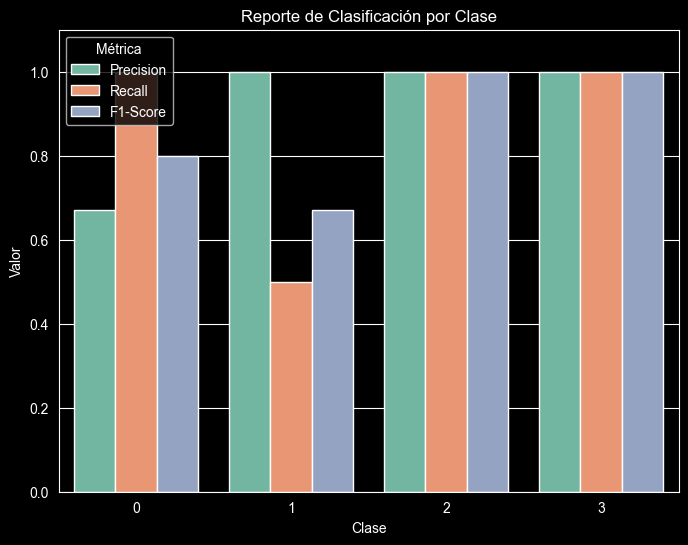

In [89]:
report_data = {
    'Clase': ['0','1','2','3'],
    'Precision': [0.67, 1.00, 1.00, 1.00],
    'Recall': [1.00, 0.50, 1.00, 1.00],
    'F1-Score': [0.80, 0.67, 1.00, 1.00],
    'Support': [2, 2, 2, 2]
}

report_df = pd.DataFrame(report_data)

report_long = report_df.melt(id_vars="Clase",
                             value_vars=["Precision","Recall","F1-Score"],
                             var_name="Métrica",
                             value_name="Valor")

plt.figure(figsize=(8,6))
sns.barplot(x="Clase", y="Valor", hue="Métrica", data=report_long, palette="Set2")

plt.title("Reporte de Clasificación por Clase")
plt.ylim(0,1.1)
plt.ylabel("Valor")
plt.legend(title="Métrica")
plt.show()